# Exercise 9.7

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

## (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [ ]:
y <- c(rep(0, nrow(Auto)))
y[Auto$mpg > median(Auto$mpg)] = 1
data <- data.frame(y = y, Auto[, -c(1)])

## (b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to fit the classifier without the gas mileage variable to produce sensible results.

In [ ]:
tune.out1 <- tune(svm, y ~ ., data=data, kernel="linear", ranges=list(cost=c(0.001, 0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out1)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.09603609 

- Detailed performance results:
   cost      error dispersion
1 1e-03 0.10881486 0.02537281
2 1e-02 0.10421950 0.03138085
3 1e-01 0.10227373 0.03634911
4 1e+00 0.09603609 0.03666741
5 5e+00 0.10034346 0.03612147
6 1e+01 0.10531309 0.03683207
7 1e+02 0.12079079 0.03864160


The best performance is achieved when the cost is 1.

## (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.

In [ ]:
tune.out2 <- tune(svm, y ~ ., data = data,
    kernel = "radial",
    ranges = list(
        cost = c(0.001, 0.01, 0.1, 1, 10, 100),
        gamma = c(0.1, 0.2, 0.5, 1, 2)
    )
)
summary(tune.out2)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10   0.1

- best performance: 0.06087625 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-03   0.1 0.49228941 0.05202210
2  1e-02   0.1 0.16566819 0.03155325
3  1e-01   0.1 0.07235584 0.03733974
4  1e+00   0.1 0.07119458 0.03898281
5  1e+01   0.1 0.06087625 0.03126506
6  1e+02   0.1 0.08159685 0.03851486
7  1e-03   0.2 0.50856608 0.05405620
8  1e-02   0.2 0.25244471 0.03363390
9  1e-01   0.2 0.07104173 0.03647568
10 1e+00   0.2 0.06339589 0.03398928
11 1e+01   0.2 0.06212194 0.03292625
12 1e+02   0.2 0.08041910 0.03662480
13 1e-03   0.5 0.53309998 0.05624352
14 1e-02   0.5 0.43946887 0.04874600
15 1e-01   0.5 0.08559157 0.02604677
16 1e+00   0.5 0.06330448 0.02814371
17 1e+01   0.5 0.07046562 0.02900611
18 1e+02   0.5 0.07472966 0.02927231
19 1e-03   1.0 0.54148814 0.05703795
20 1e-02   1.0 0.51724998 0.05595432
21 1e-01   1.0 0.31355898 0.04307895
22

The best performance is achieved when the cost is 10 with $\gamma = 0.1$.

In [ ]:
tune.out3 <- tune(svm, y ~ ., data = data,
    kernel = "polynomial",
    ranges = list(
        cost = c(0.1, 1, 10, 100, 1000, 10000),
        degree = c(1, 2, 3, 4, 5)
    )
)
summary(tune.out3)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      1

- best performance: 0.09772119 

- Detailed performance results:
    cost degree      error dispersion
1  1e-01      1 0.17998137 0.03433698
2  1e+00      1 0.10418368 0.02187980
3  1e+01      1 0.10358662 0.02963616
4  1e+02      1 0.09772119 0.03000092
5  1e+03      1 0.09938605 0.02771362
6  1e+04      1 0.11895785 0.03207978
7  1e-01      2 0.53524355 0.07323902
8  1e+00      2 0.51427413 0.07767385
9  1e+01      2 0.37166995 0.09973637
10 1e+02      2 0.25456541 0.05077171
11 1e+03      2 0.16652346 0.02091972
12 1e+04      2 0.12919067 0.02037012
13 1e-01      3 0.53701290 0.07284751
14 1e+00      3 0.53167915 0.07354908
15 1e+01      3 0.48140369 0.08122631
16 1e+02      3 0.25850198 0.05031580
17 1e+03      3 0.17154248 0.02899970
18 1e+04      3 0.13476479 0.03031202
19 1e-01      4 0.53758657 0.07277105
20 1e+00      4 0.53747036 0.07280785
21 1e+01      4 

The best performance is achieved when the cost is 100 with degree 1.

## (d) Make some plots to back up your assertions in (b) and (c).

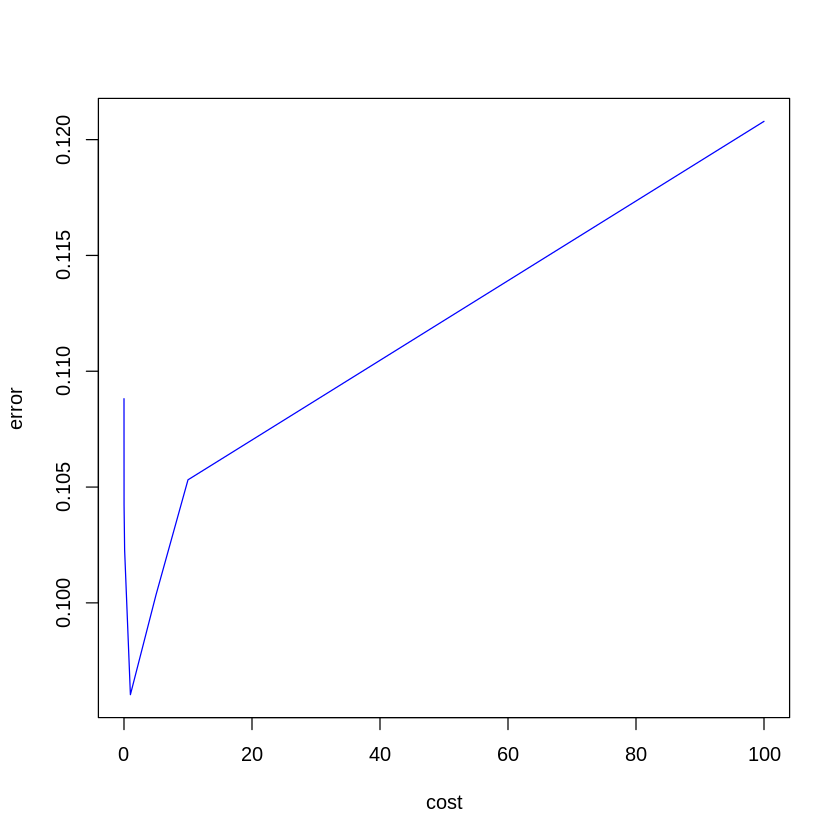

In [ ]:
plot(tune.out1$performance[, c(1,2)], col="blue", type='l')

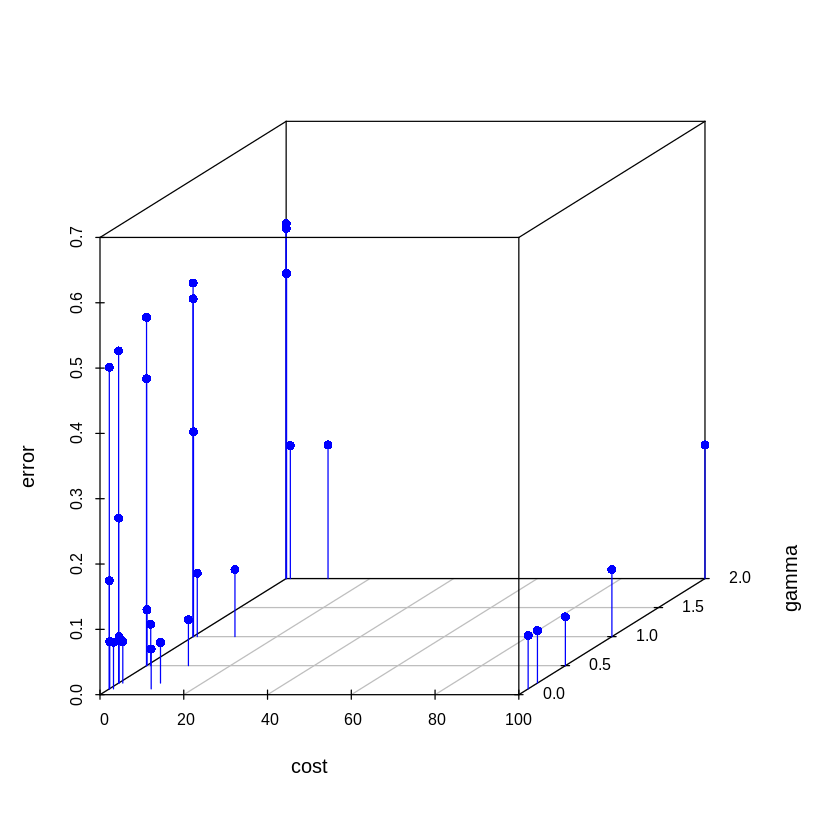

In [ ]:
scatterplot3d(tune.out2$performance[, c(1:3)], color="blue", pch=16, type='h')

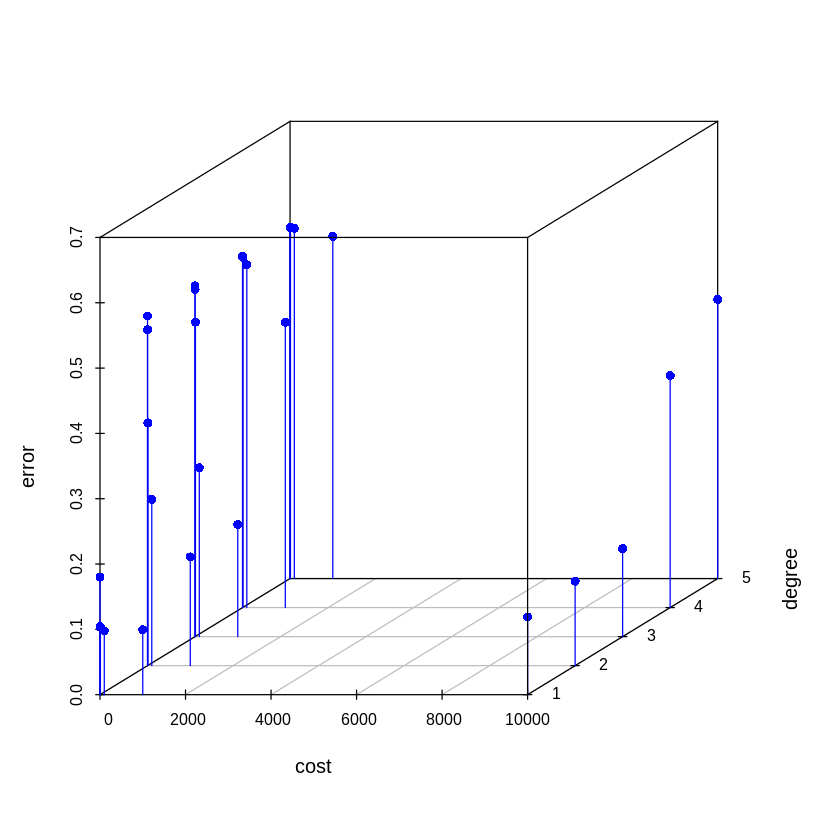

In [ ]:
scatterplot3d(tune.out3$performance[, c(1:3)], color="blue", pch=16, type='h')